In [3]:
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [4]:
nb_dir = os.path.split(os.getcwd())[0]
sys.path.append(nb_dir)

In [5]:
%load_ext autoreload
%autoreload 2
from unet.processing.process_tensor import tensor_to_image, postprocess

In [6]:
PATH = "../local_data/prediction/my_pred_tensor.pth"

In [7]:
y_tensor = torch.load(PATH, map_location=torch.device('cpu'))
print(y_tensor.shape)

torch.Size([1, 1, 32, 32, 32])


In [8]:
y_tensor_2 = torch.zeros(1,1,32,32,32)
y_tensor_2.shape

torch.Size([1, 1, 32, 32, 32])

In [9]:
y_tensor_3 = torch.cat((y_tensor, y_tensor_2), 1)
y_tensor_3.shape

torch.Size([1, 2, 32, 32, 32])

In [10]:
y_image = y_tensor.squeeze()
print(y_image.shape)

torch.Size([32, 32, 32])


In [11]:
y_image = y_image.permute(1, 2, 0)
print(y_image.shape)

torch.Size([32, 32, 32])


In [12]:
img = y_image.cpu().detach().numpy()
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(32, 32, 32)


In [13]:
image_index = 20

FULL min -4.820963 max 15.602741
SLICE min -4.3113165 max 13.600586


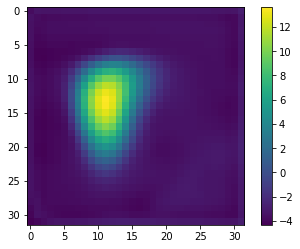

In [14]:
plt.figure()
color_map = plt.imshow(img[:,:,image_index])
plt.colorbar()

print('FULL','min', np.min(img[:,:,:]), 'max', np.max(img[:,:,:]))
print('SLICE','min', np.min(img[:,:,image_index]), 'max', np.max(img[:,:,image_index]))

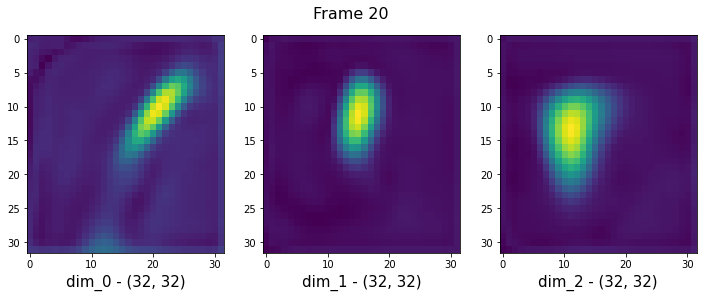

In [15]:
rows, cols = 1, 3
image_set = [img[image_index,::],img[:,image_index,:],img[:,:,image_index]]
image_name = ['dim_0','dim_1','dim_2']
fig, ax = plt.subplots(rows, cols, figsize=(12,4))
fig.suptitle('Frame {}'.format(image_index), fontsize=16)
for row in range(rows):
    for col in range(cols):
        plot_image = image_set[col]
        ax[col].imshow(plot_image, aspect='auto')
        ax[col].set_xlabel("{} - {}".format(image_name[col],plot_image.shape), fontsize=15)

In [16]:
y_tensor_3.min(), y_tensor_3.max()

(tensor(-4.8210, grad_fn=<MinBackward1>),
 tensor(15.6027, grad_fn=<MaxBackward1>))

In [20]:
print(y_tensor_3[0,0,image_index,:,:].min(), y_tensor_3[0,0,image_index,:,:].max())
print(y_tensor_3[0,0,:,image_index,:].min(), y_tensor_3[0,0,:,image_index,:].max())
print(y_tensor_3[0,0,:,:,image_index].min(), y_tensor_3[0,0,:,:,image_index].max())
print('')
print(y_tensor_3[0,1,image_index,:,:].min(), y_tensor_3[0,1,image_index,:,:].max())
print(y_tensor_3[0,1,:,image_index,:].min(), y_tensor_3[0,1,:,image_index,:].max())
print(y_tensor_3[0,1,:,:,image_index].min(), y_tensor_3[0,1,:,:,image_index].max())

tensor(-4.3113, grad_fn=<MinBackward1>) tensor(13.6006, grad_fn=<MaxBackward1>)
tensor(-4.5222, grad_fn=<MinBackward1>) tensor(5.2229, grad_fn=<MaxBackward1>)
tensor(-4.2714, grad_fn=<MinBackward1>) tensor(15.6027, grad_fn=<MaxBackward1>)

tensor(0., grad_fn=<MinBackward1>) tensor(0., grad_fn=<MaxBackward1>)
tensor(0., grad_fn=<MinBackward1>) tensor(0., grad_fn=<MaxBackward1>)
tensor(0., grad_fn=<MinBackward1>) tensor(0., grad_fn=<MaxBackward1>)


In [21]:
fmax = nn.Softmax(dim=1)
soft = fmax(y_tensor_3)
soft.shape

torch.Size([1, 2, 32, 32, 32])

In [22]:
print(soft[0,0,image_index,:,:].min(), soft[0,0,image_index,:,:].max())
print(soft[0,0,:,image_index,:].min(), soft[0,0,:,image_index,:].max())
print(soft[0,0,:,:,image_index].min(), soft[0,0,:,:,image_index].max())
print('')
print(soft[0,1,image_index,:,:].min(), soft[0,1,image_index,:,:].max())
print(soft[0,1,:,image_index,:].min(), soft[0,1,:,image_index,:].max())
print(soft[0,1,:,:,image_index].min(), soft[0,1,:,:,image_index].max())

tensor(0.0132, grad_fn=<MinBackward1>) tensor(1.0000, grad_fn=<MaxBackward1>)
tensor(0.0107, grad_fn=<MinBackward1>) tensor(0.9946, grad_fn=<MaxBackward1>)
tensor(0.0138, grad_fn=<MinBackward1>) tensor(1.0000, grad_fn=<MaxBackward1>)

tensor(1.2398e-06, grad_fn=<MinBackward1>) tensor(0.9868, grad_fn=<MaxBackward1>)
tensor(0.0054, grad_fn=<MinBackward1>) tensor(0.9893, grad_fn=<MaxBackward1>)
tensor(1.6742e-07, grad_fn=<MinBackward1>) tensor(0.9862, grad_fn=<MaxBackward1>)


In [23]:
img = soft.cpu().detach().numpy()
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1, 2, 32, 32, 32)


(32, 32)


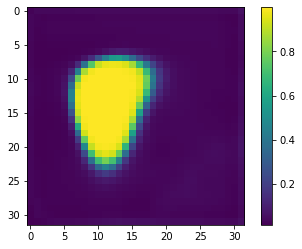

In [24]:
plt.figure()
img = img[0,0,image_index,:,:]
print(img.shape)
color_map = plt.imshow(img)
plt.colorbar()

(32, 32)


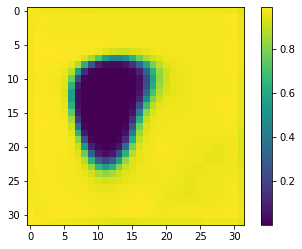

In [309]:
plt.figure()
img = img[0,1,image_index,:,:]
print(img.shape)
color_map = plt.imshow(img)
plt.colorbar()

In [290]:
np.min(img), np.max(img)

(0.013238272, 0.9999988)

In [354]:
y_image = soft.squeeze()
print(y_image.shape)

torch.Size([2, 32, 32, 32])


In [355]:
y_image = y_image.permute(0, 2, 3, 1)
print(y_image.shape)

torch.Size([2, 32, 32, 32])


In [356]:
y_image = torch.argmax(y_image, dim=0)
y_image.shape

torch.Size([32, 32, 32])

In [357]:
img_bin = y_image.cpu().detach().numpy()
print(type(img_bin))
print(img_bin.shape)
img_bin = np.where(img_bin==0,1,0)
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(32, 32, 32)
<class 'numpy.ndarray'>
(32, 32, 32)


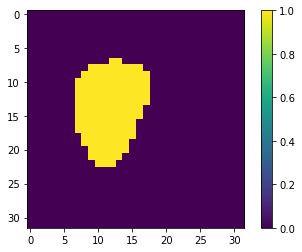

In [359]:
plt.figure()
color_map = plt.imshow(img_bin[:,:,image_index])
plt.colorbar()

In [360]:
input_  = nib.load('data/hippo_train.nii.gz')
input_data = input_.get_fdata()
print(type(input_data))
print('Height, Width, N_images, Channels')
print(input_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(32, 32, 32)


In [361]:
train  = nib.load('data/train/hippocampus_001.nii.gz')
train_data = train.get_fdata()
print(type(train_data))
print('Height, Width, N_images, Channels')
print(train_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(35, 51, 35)


In [362]:
label  = nib.load('data/label/hippocampus_001.nii.gz')
label_data = label.get_fdata()
print(type(label_data))
print('Height, Width, N_images, Channels')
print(label_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(35, 51, 35)


In [363]:
image_index = 20

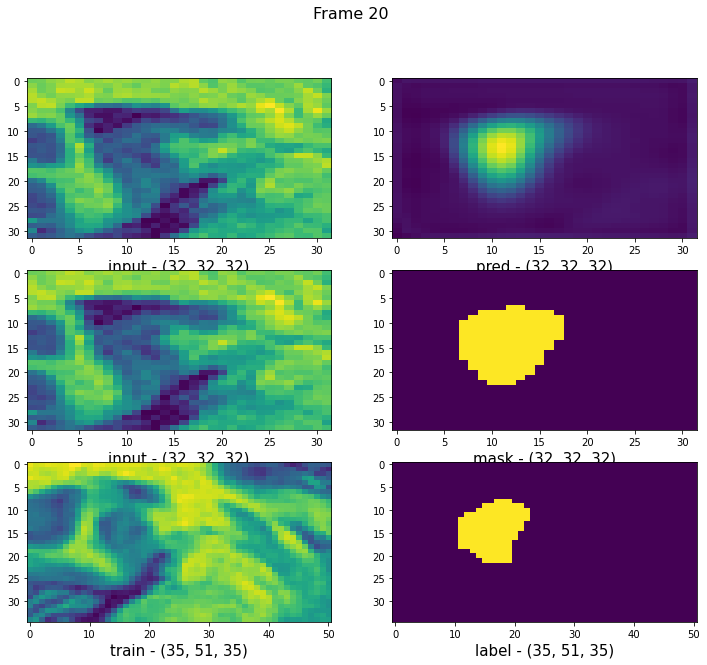

In [365]:
rows, cols = 3, 2
image_set = np.array([[input_data,img],
                      [input_data, img_bin],
                      [train_data, label_data],
                      ], dtype=object)
image_name = np.array([['input','pred'],
                       ['input','mask'],
                       ['train', 'label']])
fig, ax = plt.subplots(rows, cols, figsize=(12,10))
fig.suptitle('Frame {}'.format(image_index), fontsize=16)
for row in range(rows):
    for col in range(cols):
        plot_image = image_set[row,col]
        ax[row,col].imshow(plot_image[:,:,image_index], aspect='auto')
        ax[row,col].set_xlabel("{} - {}".format(image_name[row,col],plot_image.shape), fontsize=15)